# Evaluating DCGAN

In [39]:
import torch
from DCGAN import Generator,Discriminator

In [40]:
dcgen = Generator().to('cuda')
dcdisc = Discriminator().to('cuda')

### Load model pretrained weights

In [41]:
dcgen.load_state_dict(torch.load('./GAN weights/DCGANgen.pt'))
dcdisc.load_state_dict(torch.load('./GAN weights/DCGANdisc.pt'))

C:\Users\vishw\AppData\Local\Temp\ipykernel_21300\2213583301.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dcgen.load_state_dict(torch.load('./GAN weights/DCGANgen.pt'

<All keys matched successfully>

In [42]:
latent_dim = 128
z = torch.randn(64,latent_dim).to('cuda')

In [43]:
generated_imgs = dcgen(z)

In [44]:
generated_imgs = generated_imgs.cpu().detach().numpy()

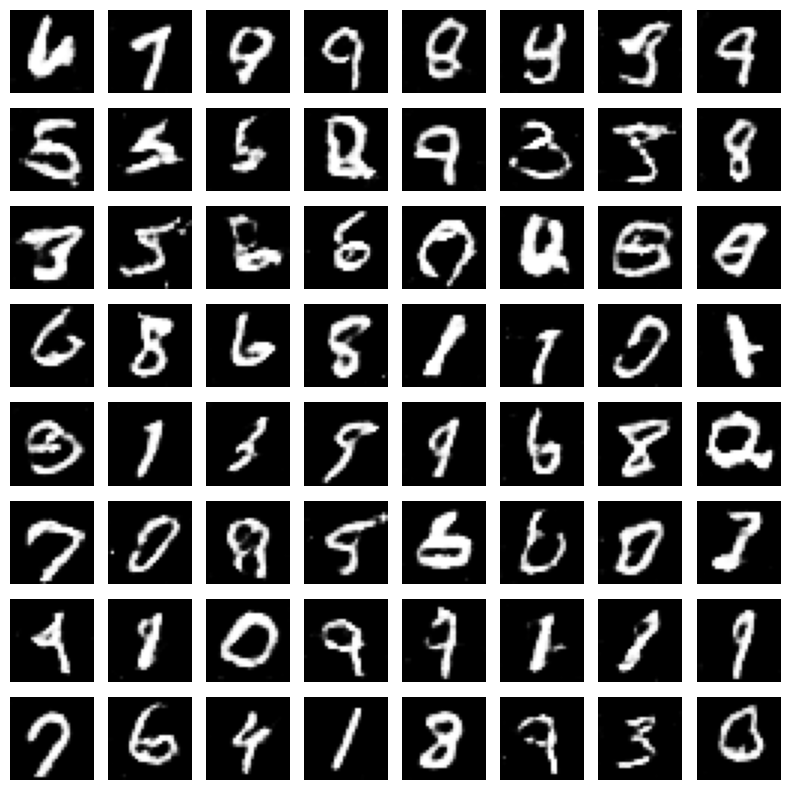

In [45]:
import matplotlib.pyplot as plt
import numpy as np
# Reshape to (batch_size, height, width) assuming grayscale images
generated_imgs_cpu = generated_imgs.reshape(64, 28, 28)

# Set up the plot grid (8x8 for 64 images)
fig, axes = plt.subplots(8, 8, figsize=(8, 8))

# Loop through each image and add it to the grid
for i, ax in enumerate(axes.flat):
    # images.append(generated_imgs_cpu[i])
    ax.imshow(generated_imgs_cpu[i], cmap='gray')
    ax.axis('off')  # Hide axes for cleaner display

plt.tight_layout()
plt.show()

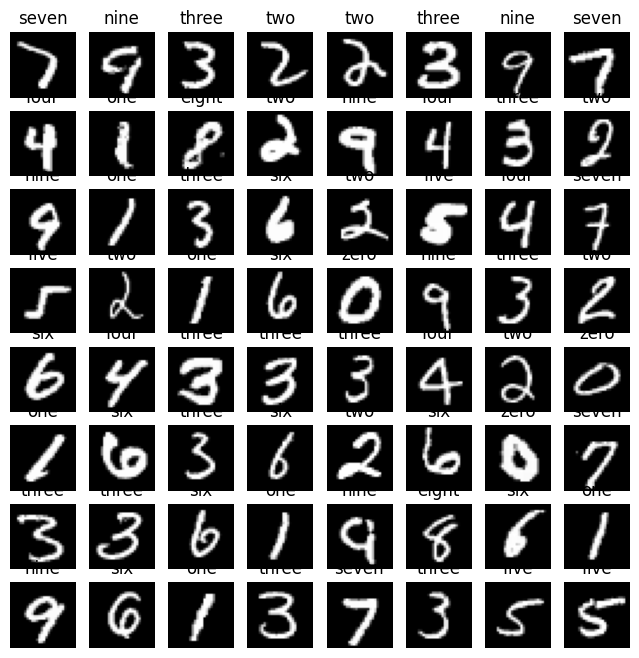

In [46]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

# Transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Download and load the MNIST dataset
train_dataset = MNIST(root='./mnist_data', train=True, transform=transform, download=True)
images = []
# Mapping from label to text for display purposes
labels_map = {
    0: "zero",
    1: "one",
    2: "two",
    3: "three",
    4: "four",
    5: "five",
    6: "six",
    7: "seven",
    8: "eight",
    9: "nine",
}

# Create a figure to display the images (8x8 grid = 64 images)
figure = plt.figure(figsize=(8, 8))
cols, rows = 8, 8  # 8 columns and 8 rows for 64 images

for i in range(1, cols * rows + 1):
    # Select a random index from the dataset
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    images.append(img.squeeze().detach().cpu().numpy())
    # Add the image to the subplot grid
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")  # Turn off axes for clean display
    plt.imshow(img.squeeze(), cmap="gray")  # Display the image in grayscale

# Display the figure with the 64 random images
plt.show()
images = np.array(images)

In [47]:
# If you haven't already, set up the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
train_dataset = MNIST(root='./mnist_data', train=True, transform=transform, download=True)

# Get a batch of real images
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
real_imgs, _ = next(iter(dataloader))
real_imgs = real_imgs.to('cuda')